In [1]:
# Paso 1: Análisis exploratorio de datos
#cargar librerias
import pandas as pd #
import numpy as np #
import seaborn as sns #
import matplotlib.pyplot as plt #

#libresisas para implementae modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #libreria para regresion lineal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#lectura de datos
datos_usi = pd.read_csv('./heart_cleveland_upload.csv')

In [3]:
# Explorar el dataset
print("Información del dataset:")
print(datos_usi.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [15]:
# Paso 2: Preprocesamiento de datos
# Comprobar si hay valores faltantes
print("\nVisualizamos los valores faltantes en el dataset:")
print(datos_usi.isnull().sum())


Visualizamos los valores faltantes en el dataset:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [17]:
# Paso 3: Selección de características relevantes
# Ver resumen estadístico
print("\nVisualizamos un reumen estadístico del dataset:")
print(datos_usi.describe())


Visualizamos un reumen estadístico del dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.

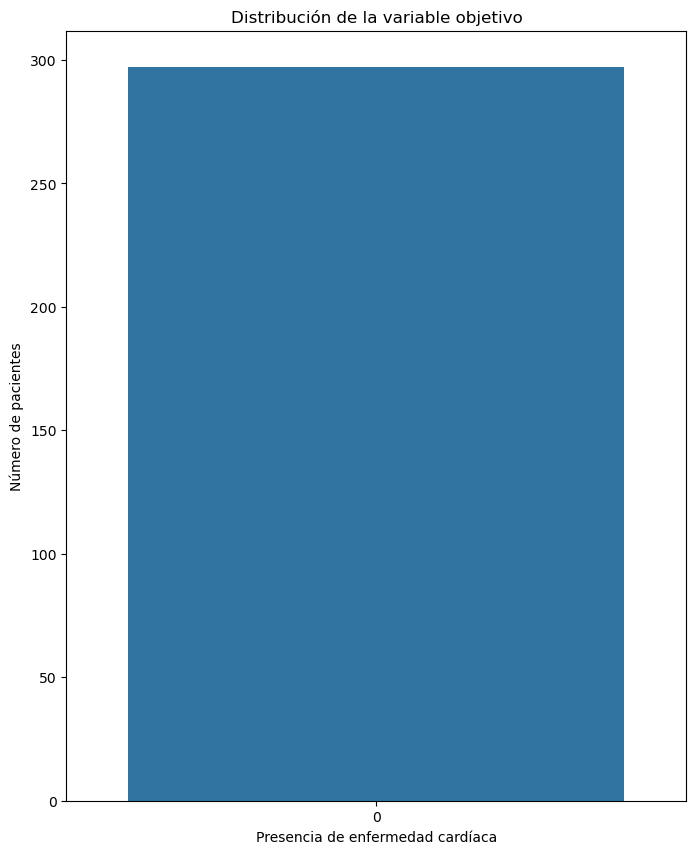

In [6]:
# Paso 3: Selección de características relevantes
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(8, 10))
sns.countplot(datos_usi['condition'])
plt.title('Distribución de la variable objetivo')
plt.xlabel('Presencia de enfermedad cardíaca')
plt.ylabel('Número de pacientes')
plt.show()

In [7]:
# Paso 4: Dividir el dataset en Train y Test
# Dividir el dataset en características (X) y variable objetivo (y)
X = datos_usi.drop('condition', axis=1)
y = datos_usi['condition']

In [25]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [26]:
# Paso 5: Entrenar el modelo
# Instanciar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [28]:
# Paso 6: Evaluar el desempeño del modelo
# Evaluar el modelo
valor_exacto = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
clasificacion = classification_report(y_test, y_pred)
# Paso 7: Visualizar los resultados

print("\nvisualizamos el valor de la Exactitud:", valor_exacto)
print("\nMatriz de confusión:")
print(matrix)
print("\nReporte de clasificación:")
print(clasificacion)


visualizamos el valor de la Exactitud: 0.84

Matriz de confusión:
[[30  4]
 [ 8 33]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        34
           1       0.89      0.80      0.85        41

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.85      0.84      0.84        75



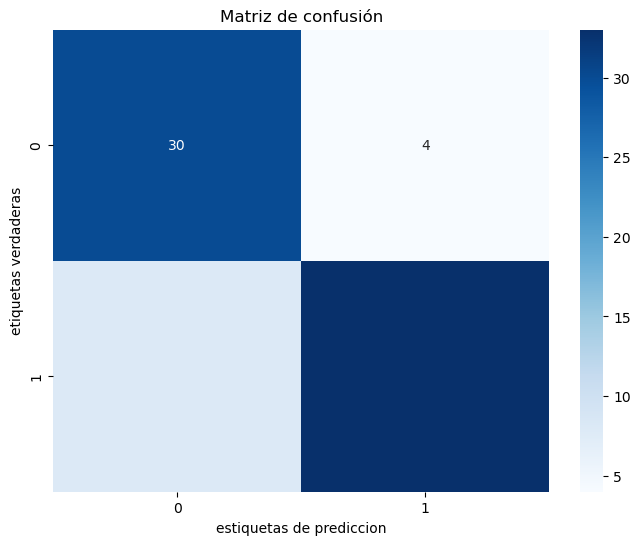

In [29]:
# Paso 7: Visualizar los resultados
# Por ejemplo, visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('estiquetas de prediccion')
plt.ylabel('etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [30]:
# Paso 8: Interpretar, analizar y documentar los resultados obtenidos